In [62]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib
import matplotlib.lines as mlines
import pickle as pk
pal = sns.color_palette()
list_colors_sns = pal.as_hex()

In [63]:
dataset = 'cifar100'
boo_name = 'Boostnet'
w_name = 'L2W-DEN'
our_name = 'JEI-DNN'
model = 't2t_14' # t2t_x
long_name = model.split('_')[0] + '_vit_' + model.split('_')[1] # t2t_vit_x


In [64]:
with open(dataset+'_'+model+'/'+long_name+'_boosted_'+dataset+'_results.pk', 'rb') as file:
        list_dict_boosted = pk.load(file)


In [65]:
# with open(dataset+'_'+model+'/'+long_name+'_baseline_'+dataset+'_results.pk', 'rb') as file:
#         list_dict_baseline = pk.load(file)

In [66]:
with open(dataset+'_'+model+'/'+long_name+'_weighted_'+dataset+'_results.pk', 'rb') as file:
        list_dict_weighted = pk.load(file)

In [67]:
if dataset == 'cifar10': 
    total_mudaa = 13.4
    end_acc = 94.5

    end_plot_acc = 0.7*end_acc
    line_acc = end_acc*0.8
    line_acc_label =r'$80\%$ of end accuracy'
    L=7
elif dataset == 'cifar100':
    total_mudaa = 56
    end_acc = 88.4
    L=14
    lambda_val_1 = 1
    lambda_val_2 = 0.9
    end_plot_acc = 0.5*end_acc
    line_acc = end_acc*0.7
    line_acc_label =r'$70\%$ of end accuracy'
elif dataset == 'svhn':
    L=7
    end_acc = 92
    end_plot_acc = 0.5*end_acc
    line_acc = end_acc*0.8
    line_acc_label =r'$80\%$ of end accuracy'
    total_mudaa = 4.3
    lambda_val_1 = 0.1
    lambda_val_2 = 4
elif dataset == 'cifar100LT':
    if model == 't2t_7':
        total_mudaa = 13
        end_acc = 90
        L=7
        end_plot_acc = 0.3*end_acc
        line_acc = end_acc*0.7
        line_acc_label =r'$70\%$ of end accuracy'
    else:
        total_mudaa = 46
        end_acc = 90
        L=14
        end_plot_acc = 0.3*end_acc
        line_acc = end_acc*0.7
        line_acc_label =r'$70\%$ of end accuracy'
    
def getting_our_data(dataset ,model):
    
    path = dataset+'_'+model+'/'
    list_files = os.listdir(path)

    list_dicts_ours = []
    for file_name in list_files:

        if '.pk' in file_name and 'sequen' not in file_name and 'baseline' not in file_name and 'boosted' not in file_name and 'weighted' not in file_name:
            print(file_name)
            lambda_val = float(file_name.split('_')[-2])
            print(lambda_val)
            with open(os.path.join(path, file_name), 'rb') as file:
                dicts = pk.load(file)
            dicts['lambda'] = lambda_val
            list_dicts_ours.append(dicts)
            
    return list_dicts_ours

def getting_seq_data(dataset ,model):
    
    path = dataset+'_'+model+'/'
    list_files = os.listdir(path)

    list_dicts_ours = []
    for file_name in list_files:

        if '.pk' in file_name and 'sequen' in file_name:
            lambda_val = float(file_name.split('_')[-2])
            print(file_name)
            with open(os.path.join(path, file_name), 'rb') as file:
                dicts = pk.load(file)
            dicts['lambda'] = lambda_val
            list_dicts_ours.append(dicts)
            
    return list_dicts_ours




In [68]:
list_dicts_ours = getting_our_data(dataset ,model)
list_dicts_seq = getting_seq_data(dataset ,model)
for dicts in list_dicts_ours:
    
    if dataset == 'cifar100' and model == 't2t_14':
        lambda_val = dicts['lambda']
        if lambda_val == lambda_val_1:
            our_point_to_display = dicts
            print('got point 1')
        if lambda_val == lambda_val_2:
            our_point2_to_display = dicts
            print('got point 2')
    else:
        our_point2_to_display = dicts
        our_point_to_display = dicts
        

09-21-2023_cifar100_t2t_vit_14_0.6_results.pk
0.6
09-21-2023_cifar100_0.01_results.pk
0.01
09-22-2023_cifar100_t2t_vit_14_1.0_results.pk
1.0
09-22-2023_cifar100_t2t_vit_14_2.0_results.pk
2.0
09-21-2023_cifar100_t2t_vit_14_0.5_results.pk
0.5
09-22-2023_cifar100_t2t_vit_14_5.0_results.pk
5.0
09-21-2023_cifar100_t2t_vit_14_3.0_results.pk
3.0
09-21-2023_cifar100_t2t_vit_14_0.7_results.pk
0.7
09-22-2023_cifar100_t2t_vit_14_0.9_results.pk
0.9
09-21-2023_cifar100_t2t_vit_14_0.8_results.pk
0.8
09-21-2023_cifar100_t2t_vit_14_2.8_results.pk
2.8
09-21-2023_cifar100_t2t_vit_14_1.5_results.pk
1.5
got point 1
got point 2


In [69]:
def extract_metrics_we_want(metrics_dict, keys_we_want):
    metrics_we_want = {}
    for key, val in metrics_dict.items():
        if key in keys_we_want:
            metrics_we_want[key] = val
    return metrics_we_want

def get_all_cov_C(metrics):
    cov_keys_dict = {}
    C_keys_dict = {}
    for key in metrics.keys():
        if 'emp_alpha' in key:
            tokens = key.split('emp_alpha')
            alpha = tokens[1]
            prefix = tokens[0]
            
            cov_key = prefix+'emp_alpha'+alpha
            C_key = prefix+'C'+alpha
            if prefix in cov_keys_dict:
                cov_keys_dict[prefix].append(cov_key)
                C_keys_dict[prefix].append(C_key)
            else:
                cov_keys_dict[prefix] = [cov_key] 
                C_keys_dict[prefix] = [C_key]  
    return cov_keys_dict, C_keys_dict

def get_all_key_with(metrics, substring):
    keys_with_substring = []
    for key in metrics.keys():
        if substring in key:
            keys_with_substring.append(key)
    return keys_with_substring

def find_highest_cov(metrics_we_care_about, cov_keys, requested_alpha):
    alpha_max = 0
    for cov_key in cov_keys:
            alpha_val = float(cov_key.split('_')[-1])
            emp_alpha = metrics_we_care_about['average'+cov_key]
            if emp_alpha< requested_alpha:
                if alpha_max < alpha_val:
                    alpha_max = alpha_val
                    #print('switching fot', alpha_val)
    #print('highest alpha is ', alpha_max, 'with emp cov', )
    return alpha_max
            

In [70]:

keys_ece = get_all_key_with(list_dicts_ours[-1], 'test/ece')
keys_we_want = ['test/acc_exit','test/total_cost', 'test/gated_acc', 'test/gated_ece', 'test/gated_ece']
cov_keys_dict, C_keys_dict = get_all_cov_C(list_dicts_ours[0])


type_of_conf = 'test/sets_general_'
cov_keys = cov_keys_dict[type_of_conf]
C_keys = C_keys_dict[type_of_conf]
cov_keys_baseline = cov_keys
C_keys_baseline = C_keys
# cov_keys_baseline = [c.split('test/')[-1] for c in cov_keys] # dumb storing thing, have to remove the test/ fo rhte baseline
# C_keys_baseline = [c.split('test/')[-1] for c in C_keys] 

print(cov_keys)
print(cov_keys_baseline)
keys_we_want = keys_we_want + cov_keys + C_keys +keys_ece
keys_gated_accs = get_all_key_with(list_dicts_ours[-1], 'gated_acc_')
keys_all_acc = get_all_key_with(list_dicts_ours[-1], 'test/acc')




['test/sets_general_emp_alpha_0.01', 'test/sets_general_emp_alpha_0.015', 'test/sets_general_emp_alpha_0.02', 'test/sets_general_emp_alpha_0.025', 'test/sets_general_emp_alpha_0.03', 'test/sets_general_emp_alpha_0.035', 'test/sets_general_emp_alpha_0.04', 'test/sets_general_emp_alpha_0.045', 'test/sets_general_emp_alpha_0.05']
['test/sets_general_emp_alpha_0.01', 'test/sets_general_emp_alpha_0.015', 'test/sets_general_emp_alpha_0.02', 'test/sets_general_emp_alpha_0.025', 'test/sets_general_emp_alpha_0.03', 'test/sets_general_emp_alpha_0.035', 'test/sets_general_emp_alpha_0.04', 'test/sets_general_emp_alpha_0.045', 'test/sets_general_emp_alpha_0.05']


In [71]:
requested_alpha = 0.05

In [72]:
def get_our_df(list_dicts_ours):
    our_df = pd.DataFrame()
    for metrics in list_dicts_ours:
        print(metrics['lambda'])
        print(np.mean(metrics['test/gated_acc']))
        print(np.mean(metrics['test/total_cost']))
        metrics_we_care_about = extract_metrics_we_want(metrics, keys_we_want)
        metrics_we_care_about['average_IC'] = np.mean(metrics_we_care_about['test/total_cost'])/total_mudaa
        metrics_we_care_about['average_ACC'] = np.mean(metrics_we_care_about['test/gated_acc'])
        metrics_we_care_about['ACC'] = metrics_we_care_about['test/gated_acc'] 

        metrics_we_care_about['ECE'] =metrics_we_care_about['test/gated_ece'] 

        for cov_key in cov_keys:
            alpha = float(cov_key.split('alpha_')[-1])

            metrics_we_care_about['average'+cov_key] = np.mean(metrics_we_care_about[cov_key])

            metrics_we_care_about['alpha'+cov_key] = alpha
        for C_key in C_keys:
            metrics_we_care_about['average'+C_key] = np.mean(metrics_we_care_about[C_key])

        alpha_max = find_highest_cov(metrics_we_care_about, cov_keys, requested_alpha)
        

        if alpha_max >0 :
            C_key = type_of_conf+'C_'+str(alpha_max)

            metrics_we_care_about['C'] = metrics_we_care_about[C_key]
            metrics_we_care_about['emp_alpha'] = alpha_max

        df = pd.DataFrame(data=metrics_we_care_about)

        our_df = pd.concat([df, our_df],axis=0, ignore_index=True)

    our_df['method'] = our_name
    return our_df
our_df = get_our_df(list_dicts_ours)
seq_df = get_our_df(list_dicts_seq)
seq_df['method'] = 'seq'

0.6
85.37979761904764
29.48488837629439
0.01
88.05732936507937
34.51735405178804
1.0
81.95390476190474
26.99791540923913
2.0
78.40507936507937
25.137361556600315
0.5
85.81817857142856
29.949181599753995
5.0
41.19596428571428
15.089400147102898
3.0
71.43184126984127
22.53642563208171
0.7
85.02907936507935
29.058817152607936
0.9
84.0061746031746
28.313213720632962
0.8
84.72050793650794
28.6823052031514
2.8
72.67594047619049
22.887742898794432
1.5
81.43846825396825
26.46677676846618


In [73]:
def replace_if_closer(points,closest_to_points, val, this_point):
    for i, point in enumerate(points):
        dif_now = np.abs(val-point)
        dif_prev = closest_to_points[i][1]
        if dif_now< dif_prev:
            closest_to_points[i] = (this_point, dif_now)
    return closest_to_points
def collect_baseline_data(list_dict_baseline, points):
    baseline_df = pd.DataFrame()
    closest_to_points = [(None, 100) for _ in points]
    for metrics in list_dict_baseline:
        metrics['average_IC'] = np.mean(metrics['EXPECTED_FLOPS'])/total_mudaa
        metrics['average_ACC'] = np.mean(metrics['ACC'])
        ic = np.mean(metrics['EXPECTED_FLOPS'])
        closest_to_points = replace_if_closer(points,closest_to_points, ic, metrics)
 
        for cov_key in cov_keys_baseline:
            alpha = float(cov_key.split('alpha_')[-1])
            metrics['average'+cov_key] = np.mean(metrics[cov_key])
            metrics['alpha'+cov_key] = float(cov_key.split('_')[-1])
        for C_key in C_keys_baseline:
            metrics['average'+C_key] = np.mean(metrics[C_key])
            
        alpha_max = find_highest_cov(metrics, cov_keys_baseline, requested_alpha)
        
        if alpha_max >0 :
            C_key = type_of_conf+'C_'+str(alpha_max)
            metrics['C'] = metrics[C_key]
            metrics['emp_alpha'] = alpha_max
        df = pd.DataFrame(data=metrics)
        baseline_df = pd.concat([df, baseline_df],axis=0, ignore_index=True)
    return baseline_df, [tuple_points[0] for tuple_points in closest_to_points]

our_point_ic  = np.mean(our_point_to_display['test/total_cost'])
our_point_acc  = np.mean(our_point_to_display['test/gated_acc'])
boosted_df, boosted_points = collect_baseline_data(list_dict_boosted, [our_point_ic, our_point_ic])
boosted_df['method'] = boo_name


/tmp/ipykernel_12232/707355923.py:37: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  boosted_df['method'] = boo_name


In [74]:
weighted_df, weighted_points = collect_baseline_data(list_dict_weighted, [our_point_ic, our_point_ic])
weighted_df['method'] = w_name
our_point_ic = our_point_ic/total_mudaa

/tmp/ipykernel_12232/1857421774.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  weighted_df['method'] = w_name


In [75]:
boosted_point_ic  = np.mean(boosted_points[0]['average_IC'])
boosted_point_acc  = np.mean(boosted_points[0]['ACC'])

weighted_point_ic  = np.mean(weighted_points[0]['average_IC'])
weighted_point_acc  = np.mean(weighted_points[0]['ACC'])


In [76]:
filtered_boosted_df = boosted_df[boosted_df['average_ACC'].between(end_plot_acc, end_acc)]
filtered_our_df = our_df[our_df['average_ACC'].between(end_plot_acc, end_acc)]
filtered_weighted_df = weighted_df[weighted_df['average_ACC'].between(end_plot_acc, end_acc)]
#filtered_baseline_df   = baseline_df[baseline_df['average_ACC'].between(end_plot_acc, end_acc)]


In [77]:
combined_df = pd.concat([seq_df, filtered_our_df],axis=0, ignore_index=True)

In [78]:
#combined_df = pd.concat([filtered_boosted_df, filtered_weighted_df],axis=0, ignore_index=True)

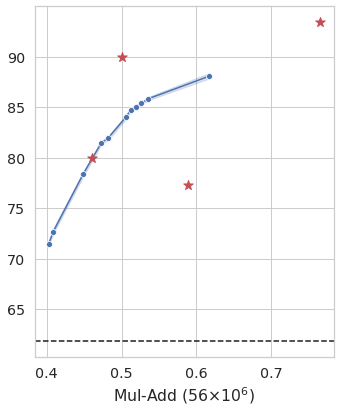

In [79]:

plt.figure(figsize=(5,6))
sns.set_theme(style="whitegrid",font_scale=1.3)
if dataset== 'cifar100':
    plt.scatter([0.46,0.5],[80,90],s=100, color='r', marker="*", zorder=100)
plt.scatter([10.25/13.4, 7.88/13.4], [93.4, 77.29],s=100, color='r', marker="*", zorder=100)
sns.lineplot(data=combined_df, x="average_IC", y="ACC", hue="method", style="method",
    markers=True, dashes=False)
plt.axhline(y=line_acc, color='k',linestyle='--', label=line_acc_label)
# plt.ylim([89,95])
# plt.xlim([0.65,0.8])
plt.legend([],[], frameon=False)
x_string = r'Mul-Add ('+str(total_mudaa)+'$ \\times 10^6$)'
plt.xlabel(x_string)
plt.ylabel('')

plt.tight_layout()
plt.savefig('figures/perf_cost_'+dataset+'.pdf')

In [80]:

# plt.figure(figsize=(5,6))
# sns.set_theme(style="whitegrid",font_scale=1.3)
# sns.lineplot(data=combined_df, x="average_IC", y="ECE", hue="method", style="method",
#     markers=True, dashes=False)


# plt.xlabel(x_string)
# plt.ylabel('ECE')
# plt.tight_layout()
# plt.savefig('figures/perf_ece_'+dataset+'.pdf')

In [81]:

# plt.figure(figsize=(5,6))
# sns.set_theme(style="whitegrid",font_scale=1.3)
# sns.lineplot(data=combined_df, x="average_IC", y="C", hue="method", style="method",
#     markers=True, dashes=False)


# plt.xlabel(x_string)
# plt.ylabel(r'$|\mathcal{\bar{C}}|$')
# plt.tight_layout()
# plt.savefig('figures/inef_IC_'+dataset+'.pdf')


In [82]:
# weighted_df_emp_vs_req = pd.DataFrame()
# boosted_df_emp_vs_req = pd.DataFrame()
# our_df_emp_vs_req = pd.DataFrame()
# for cov_key in cov_keys_baseline:
#     print(cov_key)
#     alpha = float(cov_key.split('alpha_')[-1])
#     boosted_df_cov = pd.DataFrame()
#     boosted_df_cov['emp_alpha'] = boosted_df[cov_key]
#     boosted_df_cov['requested_alpha'] = alpha
#     boosted_df_emp_vs_req = pd.concat([boosted_df_cov, boosted_df_emp_vs_req],axis=0, ignore_index=True)

#     df_cov = pd.DataFrame()
#     df_cov['emp_alpha'] = weighted_df[cov_key]
#     df_cov['requested_alpha'] = alpha
#     weighted_df_emp_vs_req = pd.concat([df_cov, weighted_df_emp_vs_req],axis=0, ignore_index=True)

#     df_cov = pd.DataFrame()
#     df_cov['emp_alpha'] = our_df[cov_key]
#     df_cov['requested_alpha'] = alpha
#     our_df_emp_vs_req = pd.concat([df_cov, our_df_emp_vs_req],axis=0, ignore_index=True)
    

In [83]:
# x = [0.01,0.05]
# y = [0.01,0.05]
# sns.set_theme(style="whitegrid")
# plt.plot(x,y, color='k',label=r'$\alpha = \hat{\alpha}$')
# sns.lineplot(data=boosted_df_emp_vs_req, x="requested_alpha", y="emp_alpha", label=boo_name)
# sns.lineplot(data=weighted_df_emp_vs_req, x="requested_alpha", y="emp_alpha", label=w_name)
# sns.lineplot(data=our_df_emp_vs_req, x="requested_alpha", y="emp_alpha", label=our_name)

# plt.xlabel(r'Theoritical (requested) $\alpha$')
# plt.ylabel(r' $\hat{\alpha}$')
# plt.tight_layout()
# plt.savefig('figures/emp_vs_theoritical_'+dataset+'.pdf')

In [84]:
num_exit_key = r'$|\mathcal{D}^l|$ (IMs usage)'
def aggregate_acc_baseline(w_metrics, delta):
    df_acc_cum = pd.DataFrame()
    cumul_acc = 0
    for l in range(L):
        all_acc = 'ALL_ACC_PER_GATE_'+str(l)
        gated_acc = 'GATED_ACC_PER_GATE_'+str(l)
        num_exit = 'EXIT_RATE_PER_GATE_'+str(l)
        df_acc = pd.DataFrame()
        df_acc['constant'] = 5
        df_acc['all'] = w_metrics[all_acc]
        if gated_acc in w_metrics:
           
            df_acc['gated'] = w_metrics[gated_acc]
            
            df_acc['gate'] = l+delta
            df_acc[num_exit_key] = np.mean(w_metrics[num_exit])
            
            frac = np.mean(metrics[num_exit])
            g_all = np.mean(metrics[gated_acc])
            
            ammount_acc = (frac * g_all)/100.0
            cumul_acc = cumul_acc + ammount_acc
            df_acc['cumul_acc'] = cumul_acc
            df_acc_cum = pd.concat([df_acc_cum, df_acc],axis=0, ignore_index=True)
    return df_acc_cum

def aggregate_acc_ours(our_m, delta):
    df_acc_ours = pd.DataFrame()
    cumul_acc = 0
    for l in range(L):
        
        all_acc = 'test/acc'+str(l)

        gated_acc = 'test/gated_acc_'+str(l)
        percent_exit = 'test/percent_exit'+str(l)
        df_acc = pd.DataFrame()
        df_acc['all'] = our_m[all_acc]
        df_acc['constant'] = 5
        
        if gated_acc in our_m and len(our_m[gated_acc]) == 10:

            df_acc['gated'] = our_m[gated_acc]
            df_acc['gate'] = l
            frac = np.mean(our_m[percent_exit])
            g_all = np.mean(our_m[gated_acc])
            
            s = np.mean([100*p for p in our_m[percent_exit]])
            
            df_acc[num_exit_key] = s
            df_acc_ours = pd.concat([df_acc_ours, df_acc],axis=0, ignore_index=True)
            ammount_acc = (frac * g_all)/100.0
            cumul_acc = cumul_acc + ammount_acc
            df_acc['cumul_acc'] = cumul_acc
        
    return df_acc_ours
    
def plotting_point(point,b_metrics, w_metrics, prefix):
    delta = 0.1
    df_acc_ours = aggregate_acc_ours(point, delta)
    df_acc_ours['method'] = our_name      

    df_acc_boosted = aggregate_acc_baseline(b_metrics, delta)
    df_acc_boosted['method'] = boo_name      

    
   
    df_acc_weighted = aggregate_acc_baseline(w_metrics, delta*2)
    df_acc_weighted['method'] = w_name

    df_acc =  pd.concat([df_acc_boosted,df_acc_weighted, df_acc_ours],axis=0, ignore_index=True)
    
    df_acc['gate'] = df_acc['gate'] +1
    df_acc['gated'] = df_acc['gated']/100.0
    df_acc['all'] = df_acc['all']/100.0
    
    
    sns.set(style="whitegrid", font_scale=1.6)
    lw =3
    g = sns.relplot(
        data=df_acc,
        x="gate", y="gated", hue='method',  size=num_exit_key,
         sizes=(5, 300))
    plt.ylim([0,1.05])
    plt.xlim([1,15])
    g.fig.set_size_inches(7,7)
    plt.axhline(np.mean(b_metrics['ACC'])/100, color=list_colors_sns[0], linestyle='--',linewidth=lw)
    plt.axhline(np.mean(w_metrics['ACC'])/100, color=list_colors_sns[1],linestyle= '--',linewidth=lw)
    plt.axhline(np.mean(point['test/gated_acc'])/100, color=list_colors_sns[2], linestyle='--',linewidth=lw)
    legend1 = plt.legend([our_name +r' accuracy ', boo_name +' accuracy', w_name +' accuracy'], loc=4)
    
    plt.gca().add_artist(legend1)
    
    g.despine(left=True, bottom=True)
    g.set(xlabel ="IMs ($l$)", ylabel = r"Accuracy on exited points ($\mathcal{D}^l$)")
    g._legend.remove()
    plt.tight_layout()
    
    plt.savefig(prefix+'_'+dataset+'gated_acc.pdf')
    
    sns.set(style="whitegrid", font_scale=1.6)
    
    g = sns.relplot(
        data=df_acc,
        x="gate", y="all", hue='method',  size=num_exit_key,
         sizes=(5, 300), legend='brief')
   
    g.despine(left=True, bottom=True)
    plt.axhline(np.mean(b_metrics['ACC'])/100, color=list_colors_sns[0], linestyle='--', linewidth=lw)
    plt.axhline(np.mean(w_metrics['ACC'])/100, color=list_colors_sns[1],linestyle= '--', linewidth=lw)
    plt.axhline(np.mean(point['test/gated_acc'])/100, color=list_colors_sns[2], linestyle='--', linewidth=lw)
    g.fig.set_size_inches(7,7)
    plt.ylim([0,1.05])
    plt.xlim([1,15])
    sns.move_legend(g, "lower right",bbox_to_anchor=(1, 0.11))
    g.set(xlabel ="IMs ($l$)", ylabel = r"Accuracy on all points ($\mathcal{D}$)")
    
    plt.tight_layout()
   
    plt.savefig(prefix+'_'+dataset+'all_acc.pdf')

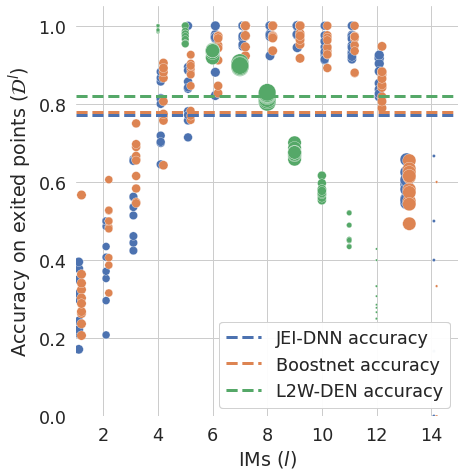

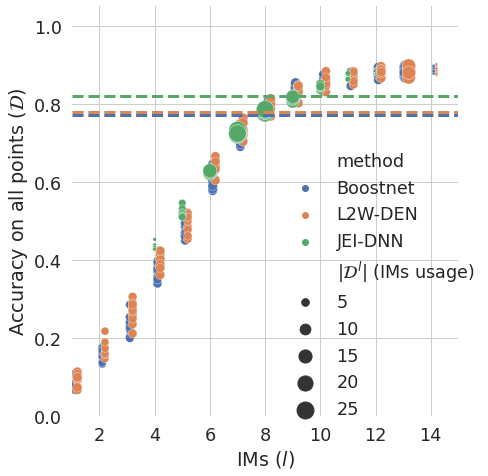

In [85]:
point = our_point_to_display
metrics = boosted_points[0]
w_metrics = weighted_points[0]
plotting_point(point,metrics, w_metrics,prefix='figures/better' )


In [40]:
cif10 = getting_our_data('cifar10' ,'t2t_14')
our_df_svhn = get_our_df(cif10)
cif100 = getting_our_data('cifar100' ,'t2t_14')
our_df_cif10 = get_our_df(cif100)
cif100lt = getting_our_data('cifar100LT' ,'t2t_14')
our_df_cif100 = get_our_df(cif100lt)

09-22-2023_cifar10_t2t_vit_14_3.0_results.pk
3.0
09-22-2023_cifar10_t2t_vit_14_0.7_results.pk
0.7
09-21-2023_cifar10_t2t_vit_14_0.6_results.pk
0.6
09-22-2023_cifar10_t2t_vit_14_5.0_results.pk
5.0
09-22-2023_cifar10_t2t_vit_14_2.0_results.pk
2.0
09-22-2023_cifar10_t2t_vit_14_0.8_results.pk
0.8
09-22-2023_cifar10_t2t_vit_14_0.9_results.pk
0.9
09-22-2023_cifar10_t2t_vit_14_1.0_results.pk
1.0
09-21-2023_cifar10_t2t_vit_14_0.5_results.pk
0.5
09-21-2023_cifar10_t2t_vit_14_0.1_results.pk
0.1
09-21-2023_cifar10_t2t_vit_14_0.01_results.pk
0.01
3.0
48.016972222222215
8.609088499427807
0.7
65.82945634920635
11.952388611185059
0.6
68.51675793650793
12.605898688000648
5.0
46.453404761904764
8.303104783333428
2.0
49.73562301587302
8.934767382740937
0.8
63.052805555555565
11.409917001264569
0.9
60.81110317460318
10.963933583311468
1.0
59.06235714285715
10.582158227660333
0.5
71.43948015873016
13.342628248831357
0.1
87.34394047619047
19.01894072197687
0.01
93.48145238095239
24.709778871299047
09-21-20

In [41]:
df_all_ece = pd.DataFrame()
for our_df in [our_df_cif10, our_df_cif100, our_df_svhn]:  
    df_acc_ours = pd.DataFrame()
    for l in range(30):
        key = 'test/ece'+str(l)
        if key in our_df:
            df_acc = pd.DataFrame()
            eces = our_df[key]
            df_acc['ece'] = eces/100
            df_acc['gate'] = l+1
            df_acc_ours = pd.concat([df_acc_ours, df_acc],axis=0, ignore_index=True)
            max_l = l+1
    print(max_l)
    df_acc_ours['gate'] = df_acc_ours['gate']
    df_all_ece = pd.concat([df_acc_ours, df_all_ece],axis=0, ignore_index=True)

13
13
13


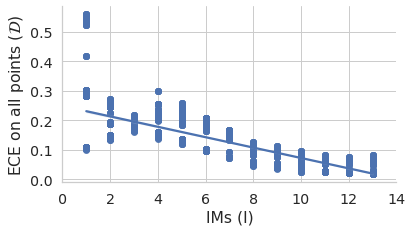

In [43]:
g= sns.lmplot(data=df_all_ece, x="gate", y="ece")
g.fig.set_size_inches(6,3.5)
plt.xlim([0,14])
plt.ylabel('ECE on all points ($\mathcal{D}$)')
plt.xlabel('IMs (l)')
plt.tight_layout()
plt.savefig('figures/average_ece.pdf')